# Homework #1


### Linear Algebra and NumPy Review
#### Question 1
Consider the two following random arrays "a" and "b". What are the shapes of a and b, and what will the shape of c be? You can do this in your head or with code.

In [2]:
import numpy as np

a = np.random.randn(2, 3)
b = np.random.randn(2, 1)
c = a + b
print(a.shape)
print(b.shape)
print(c.shape)

(2, 3)
(2, 1)
(2, 3)


#### Answer 1
The shape of a is (2,3) and the shape of b is (2,1). The shape of c will invoke "broadcasting": b (column vector) is copied 3 times so that it can be summed with each column of a. Therefore, c.shape = (2, 3).

#### Question 2
Consider the two following random arrays "a" and "b". What will be the shape of "c"? Why?

In [3]:
a = np.random.randn(4, 3)
b = np.random.randn(3, 2)
c = a * b

ValueError: operands could not be broadcast together with shapes (4,3) (3,2) 

#### Answer 2
It's going to be an error. The `*` operator indicates element-wise multiplication. Element-wise multiplication requires matrices with the same dimensions. The `@` operator or `np.dot()` should be used instead.

#### Question 3
Suppose an image $x$ is stored as a (64,64,3) array, representing a 64x64 image with 3 color channels red, green and blue. How do you reshape this into a column vector?

In [4]:
x = np.random.randn(64, 64, 3)

#### Answer 3


In [5]:
# YOUR CODE HERE
x = x.reshape((64 * 64 * 3, 1))
x.shape

(12288, 1)

### Deep Feedforward Neural Networks
#### Question 4
Which of the following are true?
1. ***X*** is a matrix in which each column is one training example.
2. $a^{[2]}_4$ is the activation output by the 4th neuron of the 2nd layer.
3. $a^{[2](12)}$ denotes the activation vector of the 2nd layer for the 12th training example.
4. $a^{[2]}$ denotes the activation vector of the 2nd layer.

#### Answer 4
All of them are true.

#### Question 5
You are building a binary classifier for recognizing cucumbers ($y=1$) vs. watermelons ($y=0$). Which one of these activation functions would you recommend using for the output layer?

1. ReLU
2. Leaky ReLU
3. sigmoid
4. tanh

#### Answer 5
(3) The sigmoid function. 
Sigmoid outputs a value between 0 and 1 which makes it a very good choice for binary classification. You can classify as 0 if the output is less than 0.5 and classify as 1 if the output is more than 0.5. It can be done with tanh as well but it is less convenient as the output is between -1 and 1.

#### Question 6
During forward propagation, in the forward function for a layer $l$, you need to know the activation function in a layer (sigmoid, tanh, ReLU, etc.). During backpropagation, the corresponding backward function also needs to know what the activation function is for layer $l$, since the gradient depends on it. True/False?

#### Answer 6
True

### Classifying newswires: a multi-class classification example
In this section, we will build a network to classify Reuters newswires into 46 different mutually-exclusive topics. Since we have many classes, this problem is an instance of "multi-class classification", and since each data point should be classified into only one category, the problem is more specifically an instance of "single-label, multi-class classification". If each data point could have belonged to multiple categories (in our case, topics) then we would be facing a "multi-label, multi-class classification" problem.

### The Reuters dataset

We will be working with the _Reuters dataset_, a set of short newswires and their topics, published by Reuters in 1986. It's a very simple, widely used toy dataset for text classification. There are 46 different topics; some topics are more represented than others, but each topic has at least 10 examples in the training set. Like IMDB and MNIST, the Reuters dataset comes packaged as part of Keras.

In [7]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Like with the IMDB dataset, the argument `num_words=10000` restricts the data to the 10,000 most frequently occurring words found in the data.

#### Question 7
How many traing and testing examples are there in this data set?


In [8]:
# YOUR CODE HERE
print(len(train_data))
print(len(test_data))

8982
2246


#### Answer 7
We have 8,982 training examples and 2,246 test examples.

As with the IMDB reviews, each example is a list of integers (word indices), and the label associated with an example is an integer between 0 and 45: a topic index.

In [9]:
print(train_data[9])   # The 10th training example's feature vector
print(train_labels[9]) # The 10th training example's label

[1, 56, 7224, 81, 40, 1175, 174, 2, 6, 1793, 10, 266, 3315, 5, 1574, 799, 317, 65, 136, 277, 801, 7, 429, 65, 182, 199, 8, 174, 201, 2540, 10, 1806, 5, 401, 20, 1574, 799, 6, 119, 20, 1574, 1075, 136, 10, 277, 498, 120, 31, 7224, 13, 251, 18, 428, 90, 289, 4, 199, 8, 4, 5880, 1806, 23, 124, 20, 799, 317, 6, 482, 20, 1075, 174, 287, 13, 799, 317, 65, 40, 333, 1398, 224, 4, 137, 130, 2, 356, 8181, 2, 172, 4, 1150, 3727, 403, 54, 139, 3045, 692, 31, 6473, 5, 799, 1306, 9, 2, 2735, 17, 12]
16


### Prepping the data
We cannot feed lists of integers into a neural network. We have to turn our lists into tensors.

#### Question 8
As you saw in class, vectorize the training examples, training labels, test examples and test labels. Recall that there is a built-in function for vectorizing the training and test labels.

#### Answer 8

In [10]:
from keras.utils.np_utils import to_categorical

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# YOUR CODE HERE

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


### Building the network
This topic classification problem looks very similar to our previous movie review classification problem: in both cases, we are trying to classify short snippets of text. There is however a new constraint here: the number of output classes has gone from 2 to 46, i.e. the 
dimensionality of the output space is much larger. 

In a stack of `Dense` layers like what we were using, each layer can only access information present in the output of the previous layer. If one layer drops some information relevant to the classification problem, this information can never be recovered by later layers: each 
layer can potentially become an "information bottleneck". In our previous example, we were using 16-dimensional intermediate layers, but a 16-dimensional space may be too limited to learn to separate 46 different classes: such small layers may act as information bottlenecks, 
permanently dropping relevant information.

#### Question 9
For this reason, you will build a network with more hidden units. Build a 3 layer network using 64 hidden units for the first 2 layers, and an appropriate number of units for the last layer. Be sure to choose an appropriate activation function for each layer.

#### Answer 9

In [11]:
from keras import models
from keras import layers

# YOUR CODE HERE
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

#### Question 10
Now compile the network using the `rmsprop` optimization algorithm, appropriate loss function, and appropriate performance measure.

#### Answer 10

In [12]:
# YOUR CODE HERE
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Validating the approach
#### Question 11 
Set apart the first 1,500 samples in the training data to be used as validation examples.

#### Answer 11

In [13]:
# YOUR CODE HERE
x_val = x_train[:1500]
partial_x_train = x_train[1500:]

y_val = one_hot_train_labels[:1500]
partial_y_train = one_hot_train_labels[1500:]

#### Question 12

Train the network for 20 epochs with a batch size of 512. Save the object as `history`.

#### Answer 12

In [14]:
# YOUR CODE HERE
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7482 samples, validate on 1500 samples
Epoch 1/20
7482/7482 [==============================] - 1s 199us/step - loss: 2.5920 - acc: 0.4834 - val_loss: 1.7943 - val_acc: 0.5887
Epoch 2/20
7482/7482 [==============================] - 1s 166us/step - loss: 1.4784 - acc: 0.6820 - val_loss: 1.4219 - val_acc: 0.6933
Epoch 3/20
7482/7482 [==============================] - 1s 167us/step - loss: 1.1178 - acc: 0.7592 - val_loss: 1.2628 - val_acc: 0.7193
Epoch 4/20
7482/7482 [==============================] - 1s 168us/step - loss: 0.8912 - acc: 0.8083 - val_loss: 1.1435 - val_acc: 0.7467
Epoch 5/20
7482/7482 [==============================] - 1s 167us/step - loss: 0.7199 - acc: 0.8470 - val_loss: 1.0701 - val_acc: 0.7673
Epoch 6/20
7482/7482 [==============================] - 1s 166us/step - loss: 0.5823 - acc: 0.8764 - val_loss: 1.0371 - val_acc: 0.7713
Epoch 7/20
7482/7482 [==============================] - 1s 167us/step - loss: 0.4691 - acc: 0.9008 - val_loss: 1.0180 - val_acc: 0.7747


### Plotting accuracy

Run the following code to display the loss and accuracy curves:

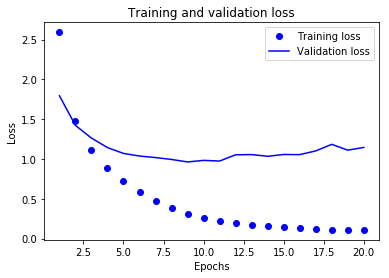

In [17]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

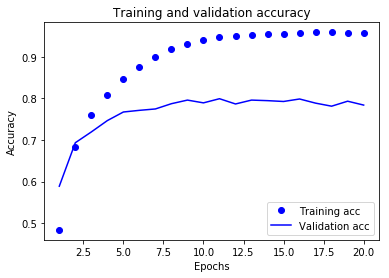

In [18]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### Question 13
When does the network start overfitting?

#### Answer 13
After 8 epochs. 

#### Question 14
Train a new network from scratch for 8 epochs, and then evaluate it on the test set. Use the same model parameters as before (number of layers, hidden units, batch size, optimixation algorithm, activation functions, performance measure).

#### Answer 14

In [19]:
# YOUR CODE HERE
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7482 samples, validate on 1500 samples
Epoch 1/8
7482/7482 [==============================] - 1s 182us/step - loss: 2.6107 - acc: 0.4910 - val_loss: 1.8024 - val_acc: 0.6253
Epoch 2/8
7482/7482 [==============================] - 1s 195us/step - loss: 1.4745 - acc: 0.6836 - val_loss: 1.4144 - val_acc: 0.6827
Epoch 3/8
7482/7482 [==============================] - 1s 170us/step - loss: 1.1045 - acc: 0.7525 - val_loss: 1.2420 - val_acc: 0.7233
Epoch 4/8
7482/7482 [==============================] - 1s 167us/step - loss: 0.8761 - acc: 0.8062 - val_loss: 1.1381 - val_acc: 0.7620
Epoch 5/8
7482/7482 [==============================] - 1s 167us/step - loss: 0.7013 - acc: 0.8510 - val_loss: 1.0604 - val_acc: 0.7733
Epoch 6/8
7482/7482 [==============================] - 1s 168us/step - loss: 0.5644 - acc: 0.8843 - val_loss: 1.0391 - val_acc: 0.7633
Epoch 7/8
7482/7482 [==============================] - 1s 166us/step - loss: 0.4550 - acc: 0.9043 - val_loss: 0.9862 - val_acc: 0.7907
Epoch 8

#### Question 15

Print the results. Briefly discuss the results and if the network performs better than a random baseline.

#### Answer 15

In [20]:
# YOUR CODE HERE
print(results)

[1.000737855822936, 0.7818343722703515]


Our approach reaches an accuracy of ~78%. With a balanced binary classification problem, the accuracy reached by a purely random classifier would be 50%, but in our case it is closer to 19%, so our results seem pretty good, at least when compared to a random baseline.

#### Question 16

Build the same network as before, but now with only 4 hidden units in your second layer. Train the network for 20 epochs and describe and comment on the difference in accuracy.

#### Answer 16

In [21]:
# YOUR CODE HERE
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7482 samples, validate on 1500 samples
Epoch 1/20
7482/7482 [==============================] - 1s 183us/step - loss: 3.6787 - acc: 0.0091 - val_loss: 3.5208 - val_acc: 0.0227
Epoch 2/20
7482/7482 [==============================] - 1s 196us/step - loss: 3.3786 - acc: 0.0243 - val_loss: 3.2792 - val_acc: 0.0340
Epoch 3/20
7482/7482 [==============================] - 1s 166us/step - loss: 3.0990 - acc: 0.0461 - val_loss: 3.0309 - val_acc: 0.0693
Epoch 4/20
7482/7482 [==============================] - 1s 167us/step - loss: 2.7981 - acc: 0.1914 - val_loss: 2.7548 - val_acc: 0.2287
Epoch 5/20
7482/7482 [==============================] - 1s 166us/step - loss: 2.4578 - acc: 0.2493 - val_loss: 2.4344 - val_acc: 0.2393
Epoch 6/20
7482/7482 [==============================] - 1s 164us/step - loss: 2.0955 - acc: 0.3176 - val_loss: 2.1331 - val_acc: 0.5607
Epoch 7/20
7482/7482 [==============================] - 1s 164us/step - loss: 1.7586 - acc: 0.6052 - val_loss: 1.8792 - val_acc: 0.5820


In [22]:
print(results)

[1.5325054305001018, 0.6869991095811261]


The accuracy for the validation set is ~68.7%. This is quite a bit lower than the accuracy we had above when we had 64 hidden units in each hidden layer. This is an example of how a bottleneck will decrease accuracy due to a loss of information.

#### Question 17

Now build the original network but with 32 hidden units in each hidden layer. Train the network for 20 epochs and describe and comment on the difference in accuracy.

#### Answer 17

In [23]:
# YOUR CODE HERE
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7482 samples, validate on 1500 samples
Epoch 1/20
7482/7482 [==============================] - 1s 148us/step - loss: 3.1164 - acc: 0.3482 - val_loss: 2.3709 - val_acc: 0.5187
Epoch 2/20
7482/7482 [==============================] - 1s 128us/step - loss: 1.9632 - acc: 0.6136 - val_loss: 1.7365 - val_acc: 0.6387
Epoch 3/20
7482/7482 [==============================] - 1s 128us/step - loss: 1.4781 - acc: 0.6975 - val_loss: 1.4835 - val_acc: 0.6773
Epoch 4/20
7482/7482 [==============================] - 1s 128us/step - loss: 1.2243 - acc: 0.7363 - val_loss: 1.3416 - val_acc: 0.7067
Epoch 5/20
7482/7482 [==============================] - 1s 127us/step - loss: 1.0465 - acc: 0.7756 - val_loss: 1.2528 - val_acc: 0.7113
Epoch 6/20
7482/7482 [==============================] - 1s 127us/step - loss: 0.9046 - acc: 0.8046 - val_loss: 1.1756 - val_acc: 0.7447
Epoch 7/20
7482/7482 [==============================] - 1s 129us/step - loss: 0.7849 - acc: 0.8320 - val_loss: 1.1249 - val_acc: 0.7520


In [24]:
print(results)

[1.0861815098450849, 0.7791629563668745]


We achieve an accuracy of 77.9% which is the same as the original model with 64 hidden units in each hidden layer. It seems like decreasing the number of hidden nodes didn't hurt the accuracy and that this smaller model would be preferred over the more complex one above. 

#### Question 18

Now build a network with 3 hidden layers with 64 hidden units in each layer. Train the network for 20 epochs and describe and comment on the difference in accuracy.

#### Answer 18

In [25]:
# YOUR CODE HERE
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7482 samples, validate on 1500 samples
Epoch 1/20
7482/7482 [==============================] - 1s 190us/step - loss: 2.6364 - acc: 0.5164 - val_loss: 1.7266 - val_acc: 0.6347
Epoch 2/20
7482/7482 [==============================] - 1s 162us/step - loss: 1.4082 - acc: 0.7003 - val_loss: 1.3868 - val_acc: 0.6993
Epoch 3/20
7482/7482 [==============================] - 1s 160us/step - loss: 1.0679 - acc: 0.7637 - val_loss: 1.2654 - val_acc: 0.7220
Epoch 4/20
7482/7482 [==============================] - 1s 164us/step - loss: 0.8515 - acc: 0.8075 - val_loss: 1.2058 - val_acc: 0.7427
Epoch 5/20
7482/7482 [==============================] - 1s 194us/step - loss: 0.6860 - acc: 0.8455 - val_loss: 1.0981 - val_acc: 0.7640
Epoch 6/20
7482/7482 [==============================] - 1s 163us/step - loss: 0.5356 - acc: 0.8816 - val_loss: 1.1899 - val_acc: 0.7533
Epoch 7/20
7482/7482 [==============================] - 1s 159us/step - loss: 0.4408 - acc: 0.9055 - val_loss: 1.1448 - val_acc: 0.7767


In [26]:
print(results)

[1.3123582341473545, 0.7849510240427426]


This model achieves an accuracy of 78.5%, which is again close to the original model above with 2 hidden layers and 64 units in each hidden layer. It looks like adding a layer doesn't increase the accuracy and a network with only 2 hidden layers would suffice.

#### Question 19

Now build a network with 3 hidden layers with 128 hidden units in each layer. Train the network for 20 epochs and describe and comment on the difference in accuracy.

#### Answer 19

In [27]:
# YOUR CODE HERE
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7482 samples, validate on 1500 samples
Epoch 1/20
7482/7482 [==============================] - 2s 287us/step - loss: 2.2908 - acc: 0.5152 - val_loss: 1.5568 - val_acc: 0.6373
Epoch 2/20
7482/7482 [==============================] - 2s 244us/step - loss: 1.1880 - acc: 0.7203 - val_loss: 1.2043 - val_acc: 0.7273
Epoch 3/20
7482/7482 [==============================] - 2s 243us/step - loss: 0.8557 - acc: 0.8051 - val_loss: 1.1291 - val_acc: 0.7500
Epoch 4/20
7482/7482 [==============================] - 2s 247us/step - loss: 0.6466 - acc: 0.8519 - val_loss: 1.0181 - val_acc: 0.7773
Epoch 5/20
7482/7482 [==============================] - 2s 241us/step - loss: 0.4767 - acc: 0.8927 - val_loss: 0.9623 - val_acc: 0.8040
Epoch 6/20
7482/7482 [==============================] - 2s 278us/step - loss: 0.3470 - acc: 0.9268 - val_loss: 1.3600 - val_acc: 0.7073
Epoch 7/20
7482/7482 [==============================] - 2s 242us/step - loss: 0.2936 - acc: 0.9308 - val_loss: 1.0062 - val_acc: 0.7960


In [28]:
print(results)

[1.41658746166518, 0.7702582368655387]


Again we see that increasing the number of hidden units does not increase the accuracy of the model and that a smaller model would suffice.

### Fighting Overfitting

#### Question 20
Use the original network from Question 14 and the smaller network from Question 16. Make a single plot that shows their validation loss across epochs. Comment on when each network starts overfitting.

#### Answer 20

In [32]:
# YOUR CODE HERE
# Question 14
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history14 = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

# Question 16
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history16 = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))

results16 = model.evaluate(x_test, one_hot_test_labels)


Train on 7482 samples, validate on 1500 samples
Epoch 1/20
7482/7482 [==============================] - 1s 199us/step - loss: 2.6099 - acc: 0.5254 - val_loss: 1.7836 - val_acc: 0.6240
Epoch 2/20
7482/7482 [==============================] - 1s 161us/step - loss: 1.4264 - acc: 0.7045 - val_loss: 1.3891 - val_acc: 0.6980
Epoch 3/20
7482/7482 [==============================] - 1s 156us/step - loss: 1.0624 - acc: 0.7728 - val_loss: 1.2040 - val_acc: 0.7287
Epoch 4/20
7482/7482 [==============================] - 1s 160us/step - loss: 0.8418 - acc: 0.8184 - val_loss: 1.1036 - val_acc: 0.7593
Epoch 5/20
7482/7482 [==============================] - 1s 165us/step - loss: 0.6742 - acc: 0.8591 - val_loss: 1.0543 - val_acc: 0.7720
Epoch 6/20
7482/7482 [==============================] - 1s 183us/step - loss: 0.5432 - acc: 0.8865 - val_loss: 1.0117 - val_acc: 0.7840
Epoch 7/20
7482/7482 [==============================] - 1s 157us/step - loss: 0.4370 - acc: 0.9091 - val_loss: 0.9974 - val_acc: 0.7813


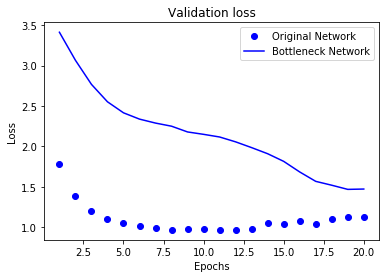

In [33]:
# Plot the results
val_loss1 = history14.history['val_loss']
val_loss2 = history16.history['val_loss']

epochs = range(1, 21)

plt.plot(epochs, val_loss1, 'bo', label='Original Network')
plt.plot(epochs, val_loss2, 'b', label='Bottleneck Network')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The network from question 16 has a much higher loss value across all epochs. As the network from question 14 starts to overfit, the loss values get closer and start to converge.

#### Question 21

Now add 2 `Dropout` layers to the original network. Make a plot of the validation loss across epochs for the original network and the dropout-regularized network. Comment on the difference.

#### Answer 21

In [35]:
# YOUR CODE HERE
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7482 samples, validate on 1500 samples
Epoch 1/20
7482/7482 [==============================] - 2s 215us/step - loss: 3.0018 - acc: 0.3248 - val_loss: 2.1652 - val_acc: 0.5347
Epoch 2/20
7482/7482 [==============================] - 1s 164us/step - loss: 2.1093 - acc: 0.4924 - val_loss: 1.7137 - val_acc: 0.6187
Epoch 3/20
7482/7482 [==============================] - 1s 189us/step - loss: 1.7570 - acc: 0.5810 - val_loss: 1.5080 - val_acc: 0.6667
Epoch 4/20
7482/7482 [==============================] - 1s 164us/step - loss: 1.5521 - acc: 0.6246 - val_loss: 1.3940 - val_acc: 0.6927
Epoch 5/20
7482/7482 [==============================] - 1s 159us/step - loss: 1.4112 - acc: 0.6593 - val_loss: 1.3247 - val_acc: 0.7007
Epoch 6/20
7482/7482 [==============================] - 1s 163us/step - loss: 1.3106 - acc: 0.6897 - val_loss: 1.2596 - val_acc: 0.7160
Epoch 7/20
7482/7482 [==============================] - 1s 159us/step - loss: 1.2328 - acc: 0.6982 - val_loss: 1.2234 - val_acc: 0.7273


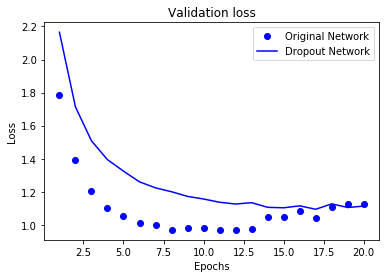

In [36]:
# Plot the results
val_loss1 = history14.history['val_loss']
val_loss2 = history.history['val_loss']

epochs = range(1, 21)

plt.plot(epochs, val_loss1, 'bo', label='Original Network')
plt.plot(epochs, val_loss2, 'b', label='Dropout Network')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The model with dropout does have higher loss until epoch 18 where the loss values meet for each network. At this point, the model without dropout has already begun to overfit while the dropout model loss is starting to plateau.

#### Question 22

Name another method to reduce overfitting.

#### Answer 22

Weight regularization.